## Quesiton 1

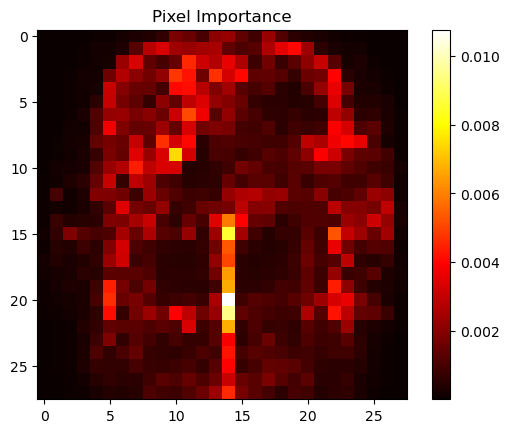

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()
X = np.concatenate((X_train,X_test),axis=0)
y = np.concatenate((y_train,y_test),axis=0)

X = X.reshape((X.shape[0], -1)) / 255.0

rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
rf_clf.fit(X, y)

importances = rf_clf.feature_importances_.reshape(28,28)

plt.imshow(importances, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Pixel Importance")
plt.show()

In [7]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt


(x_train, _), (x_test, _) = fashion_mnist.load_data()


x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Adding noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.) # clipped between 0 and 1 to ensure valid pixel intensity range.
x_test_noisy = np.clip(x_test_noisy, 0., 1.) # clipped between 0 and 1 to ensure valid pixel intensity range.


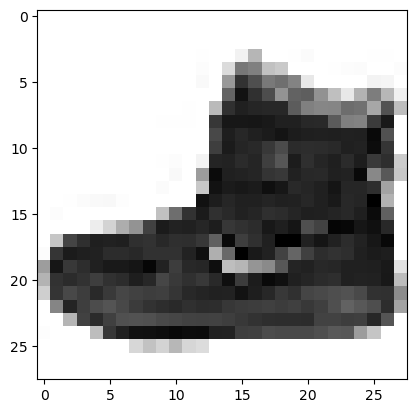

In [8]:
plt.imshow(x_train[0], cmap='gray_r')

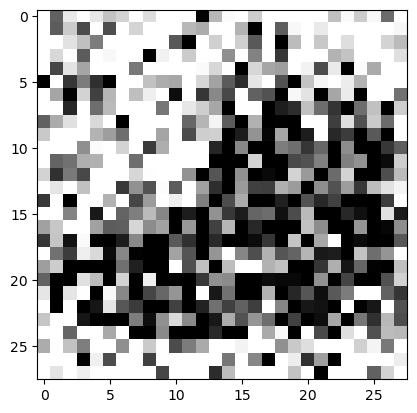

In [9]:
plt.imshow(x_train_noisy[0], cmap='gray_r')

In [10]:
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

denoised_image = autoencoder.predict(np.array([x_test_noisy[0]]))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248  

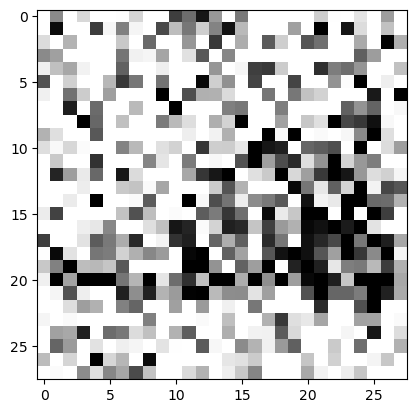

In [11]:
plt.imshow(x_test_noisy[0], cmap='gray_r')

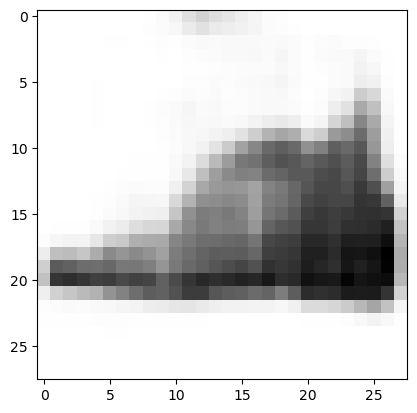

In [12]:
plt.imshow(denoised_image[0], cmap='gray_r')